In [8]:
import config
import gspread
import pandas as pd

gc = gspread.service_account()
sheet = gc.open("Optic Lab Shooting schedule")
            
#worksheet_list = sh.worksheets()
#print(worksheet_list)
#print(sh.sheet1.get('A1'))


temp_worksheet = sheet.worksheet("temperaturas")
temp_dataframe = pd.DataFrame(temp_worksheet.get_all_records())
video_worksheet = sheet.worksheet("Total Footage")


In [11]:
values_list = video_worksheet.row_values(1)
print(values_list)


['Usage', 'FILE', 'Temperature', 'Device', 'Communication', 'Motion', 'Light', 'color', 'fps', 'Camera_model', 'Lens', 'Camera', 'Alice & Bob', 'Feeling', 'Carmen', 'Agustina', 'comments?', 'r', 's', 't', 'u']


In [12]:
video_dataframe = pd.DataFrame(video_worksheet.get_all_records())

In [13]:
video_dataframe.head(600)

,Usage,FILE,Temperature,Device,Communication,Motion,Light,color,fps,Camera_model,...,Camera,Alice & Bob,Feeling,Carmen,Agustina,comments?,r,s,t,u
0,N,B025_09251029_C001.braw,MILD,Optic Table (A),Prep,Top view,Dark,R/G,25,Kyu,...,human,,,"\nDe cada uno he probado croppings distintos, ...",the pole in the middle esta raro en la oscuridad,Advice:\nSeria bueno que tu empezaras a tag lo...,,,,
1,N,B025_09251032_C002.braw,MILD,Optic Table (A),Prep,Top view,Dark,R/G,25,Kyu,...,human,,,,las imagenes on la linterna con interesantes. ...,,,,,
2,Y,B025_09251035_C003.braw,MILD,Optic Table (A),Prep,Top view,Semi,R/G,25,Kyu,...,human,,,,Lindos movimientos de linterna. me gusta la ca...,,,,,
3,N,B025_09251043_C004.braw,MILD,Optic Table (A),Prep,Top view,Semi,R/G,25,Kyu,...,,,,,linterna,,,,,
4,N,B025_09251046_C005.braw,MILD,Optic Table (A),Prep,Top view,Light,R/G,25,Kyu,...,,,,,buena imagen. tenesmo que corpear para que no ...,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Y,IMG_4618.MOV,COLD,Diamond Growing,Entangelment,Focus,,,,,...,,,,,,,,,,
517,Y,IMG_4619.MOV,COLD,Diamond Growing,Entangelment,Focus,,,,,...,,,,,,,,,,
518,Y,IMG_4620.mov,COLD,Diamond Growing,Entangelment,Focus,,,,,...,,,,,,,,,,
519,Y,IMG_4621.MOV,COLD,Diamond Growing,Entangelment,Focus,,,,,...,,,,,,,,,,


In [3]:
temp_dataframe.head(8)

,CATEGORIA,Amount:,Aprox Total Time,temp difference,runtime per degree,From (*C):,To (*C):,Sound:,Description:
0,CARING,13,9:38:00,4,2:24:30,41,above 41,,Diamond Growth and Piranha Clean Room
1,LONELY,36,10:14:00,4,2:33:30,37,41,,Route and Abandoned KPN
2,STABILITY,20,8:19:00,3,2:46:20,34,37,,Clocks and Diamond Model
3,WAITING,15,8:13:00,3,2:44:20,31,34,,Clocks - Machines - Estanterías - Samples
4,PRESSURE,10,3:50:00,2,1:55:00,29,31,,Nitrogen and some clocks
5,SUSPENSE,16,9:09:00,4,2:17:15,25,29,,Optical Table and Golden Tower
6,FLIRTING,24,7:28:00,3,2:29:20,22,25,,Diamante microscopio
7,EXCITEMENT,31,13:07:00,4,3:16:45,18,22,,Laser


In [15]:
%matplotlib inline
matplotlib.use('nbagg')

import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

NameError: name 'matplotlib' is not defined

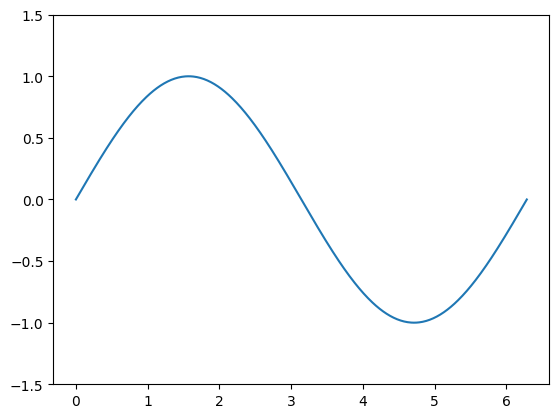

In [16]:
import time
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

fig, ax = plt.subplots()
th = np.linspace(0, 2*np.pi, 512)
ax.set_ylim(-1.5, 1.5)

ln, = ax.plot(th, np.sin(th))

def slow_loop(N, ln):
    for j in range(N):
        time.sleep(.1)  # to simulate some work
        ln.figure.canvas.flush_events()

slow_loop(100, ln)

In [18]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

class LivePlotNotebook(object):
    """
    Live plot using %matplotlib notebook in jupyter notebook
    
    Usage:
    ```
    import time
    liveplot = LivePlotNotebook()
    x=np.random.random((10,))
    for i in range(10):
        time.sleep(1)
        liveplot.update(
            x=x+np.random.random(x.shape)/10,
            actions=np.random.randint(0, 3, size=(10,))
        )
    ```
    
    url:
    """

    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1)
        
        ax.plot([0]*20, label='price')
        ax.plot([1]*20, [1]*20, 'o', ms=12,c='gray', label='hold')
        ax.plot([0]*20, [0]*20, '^', ms=12,c='blue', label='buy' )
        ax.plot([0]*20, [0]*20, 'v', ms=12,c='red', label='sell')
        
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.grid()
        ax.set_title('actions')
        
        self.ax = ax
        self.fig = fig

    def update(self, x, actions):             
        # update price
        line = self.ax.lines[0]
        line.set_xdata(range(len(x)))
        line.set_ydata(x)
        
        # update action plots
        for i, line in enumerate(self.ax.lines[1:]):
            line.set_xdata(np.argwhere(actions==i).T)
            line.set_ydata(x[actions==i])
            line.set_marker(['o','^','v'][i])

        # update limits
        self.ax.set_xlim(0, len(actions))
        self.ax.set_ylim(x.min(), x.max())

        self.fig.canvas.draw()
        
# Test
import time
liveplot = LivePlotNotebook()
x=np.random.random((10,))
for i in range(10):
    time.sleep(1)
    liveplot.update(
        x=x+np.random.random(x.shape)/10,
        actions=np.random.randint(0, 3, size=(10,))
    )

<IPython.core.display.Javascript object>

In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

<IPython.core.display.Javascript object>